PLA6619 Introduction to Urban Data and Informatics I \
Tuesday, October 27, 2020 \
Week08

# Lab 06: GeoPandas and Spatial Analysis

Please submit __Lab06.ipynb with outputs__ on Canvas by 11:59pm (EST). 

## IMPORTANT: Requirements for geospatial analytics in Python
        
* GeoPandas should be installed before running scripts.
* You should be familiar with sptaial data format (e.g. shapefile) and gemoetry.

__Resources:__
* Geopandas technical documentation (official). https://geopandas.org/ 
* Geopandas technical documentation (GitHub). https://github.com/geopandas/geopandas 
* Geopandas tutorial example. https://www.datacamp.com/community/tutorials/geospatial-data-python 


# Load required packages

In [2]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import geopandas as gpd # GeoPandas library for spatial analytics
from shapely.geometry import shape

from urllib.parse import urlencode
import urllib.request, json 

import matplotlib.pyplot as plt
import seaborn as sns # visualization styling package
%matplotlib inline 

# PART 1. Intro to GeoPandas
## 1. Load spatial data

    Syntax:
    VARIABLE_NAME = gpd.read_file('YOUR_FILE_PATH')

In [3]:
# Load spatial datasets
nyc_boro = gpd.read_file(gpd.datasets.get_path('nybb'))
nyc_boro.head()

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."


In [4]:
subway_lines = gpd.read_file('../data/Subway Lines')
subway_lines.head()

,id,name,objectid,rt_symbol,shape_len,url,geometry
0,2000393.0,G,753.0,G,2438.200249,http://web.mta.info/nyct/service/,"LINESTRING (-73.99488 40.68020, -73.99427 40.6..."
1,2000394.0,G,754.0,G,3872.834411,http://web.mta.info/nyct/service/,"LINESTRING (-73.97958 40.65993, -73.97966 40.6..."
2,2000469.0,Q,755.0,N,1843.366331,http://web.mta.info/nyct/service/,"LINESTRING (-73.97586 40.57597, -73.97654 40.5..."
3,2000294.0,M,756.0,B,1919.559203,http://web.mta.info/nyct/service/,"LINESTRING (-73.92414 40.75229, -73.92405 40.7..."
4,2000296.0,M,757.0,B,2385.698536,http://web.mta.info/nyct/service/,"LINESTRING (-73.91345 40.75617, -73.90905 40.7..."


In [6]:
subway_stations = pd.read_json('https://data.cityofnewyork.us/resource/kk4q-3rt2.json')
subway_stations['the_geom'] = subway_stations['the_geom'].apply(shape)
subway_stations = gpd.GeoDataFrame(subway_stations, crs="EPSG:4326").set_geometry('the_geom')

subway_stations.head()

,url,objectid,name,the_geom,line,notes
0,http://web.mta.info/nyct/service/,1,Astor Pl,POINT (-73.99107 40.73005),4-6-6 Express,"4 nights, 6-all times, 6 Express-weekdays AM s..."
1,http://web.mta.info/nyct/service/,2,Canal St,POINT (-74.00019 40.71880),4-6-6 Express,"4 nights, 6-all times, 6 Express-weekdays AM s..."
2,http://web.mta.info/nyct/service/,3,50th St,POINT (-73.98385 40.76173),1-2,"1-all times, 2-nights"
3,http://web.mta.info/nyct/service/,4,Bergen St,POINT (-73.97500 40.68086),2-3-4,"4-nights, 3-all other times, 2-all times"
4,http://web.mta.info/nyct/service/,5,Pennsylvania Ave,POINT (-73.89489 40.66471),3-4,"4-nights, 3-all other times"


## 2. Plot spatial data (with default setting)

* Resource: https://geopandas.org/mapping.html

        Syntax:
        YOUR_GEOPANDAS_DATFRAME.plot()

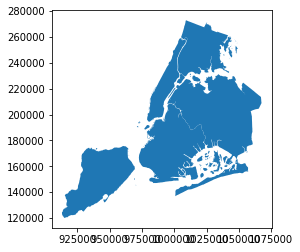

In [7]:
# Default setting
nyc_boro.plot()

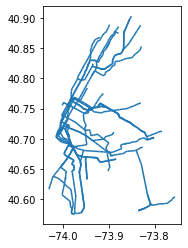

In [8]:
subway_lines.plot()

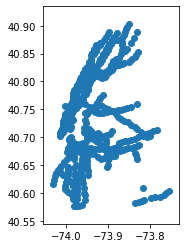

In [9]:
subway_stations.plot()

## 3. Check and convert CRS

    Syntax for checking current CRS:
        YOUR_GEOPANDAS_DATAFRAME.crs
        
    Syntax for a projection:
        YOUR_GEOPANDAS_DATAFRAME.to_crs = "NEW_CRS"
        
__Important notice:__
Depending on a version of GeoPandas and pyproj, you might need a different code. Please refer to this page (https://jorisvandenbossche.github.io/blog/2020/02/11/geopandas-pyproj-crs/) 

In [12]:
print(nyc_boro.crs)
print(subway_lines.crs)
print(subway_stations.crs)

print(nyc_boro.crs.name)
print(subway_lines.crs.name)
print(subway_stations.crs.name)

epsg:2263
epsg:4326
EPSG:4326
NAD83 / New York Long Island (ftUS)
WGS 84
WGS 84


In [14]:
# Let's set crs using the NAD83/New York Long Island (ftUS) - EPSG:2263
subway_lines = subway_lines.to_crs(2263)
subway_stations = subway_stations.to_crs(2263)

In [15]:
print(nyc_boro.crs)
print(subway_lines.crs)
print(subway_stations.crs)

epsg:2263
epsg:2263
epsg:2263


## 4. Plot all spatial data together
* Make sure all data have the same crs
* Colors: https://matplotlib.org/3.1.0/gallery/color/named_colors.html
<img src="https://matplotlib.org/3.1.0/_images/sphx_glr_named_colors_003.png" alt="drawing" width="500"/>
* Colormap types: https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

In [26]:
subway_lines['color'] = 'lightgrey'
subway_lines['color'][subway_lines['name'].str.contains("N|Q|R|W", na=False)] = 'Gold'
subway_lines['color'][subway_lines['name'].str.contains("1|2|3", na=False)] = 'Red'
subway_lines['color'][subway_lines['name'].str.contains("4|5|6", na=False)] = 'Green'
subway_lines['color'][subway_lines['name'].str.contains("A|C|E", na=False)] = 'navy'
subway_lines['color'][subway_lines['name'].str.contains("F|M|B|D", na=False)] = 'darkorange'
subway_lines['color'][subway_lines['name'].str.contains("7", na=False)] = 'deeppink'

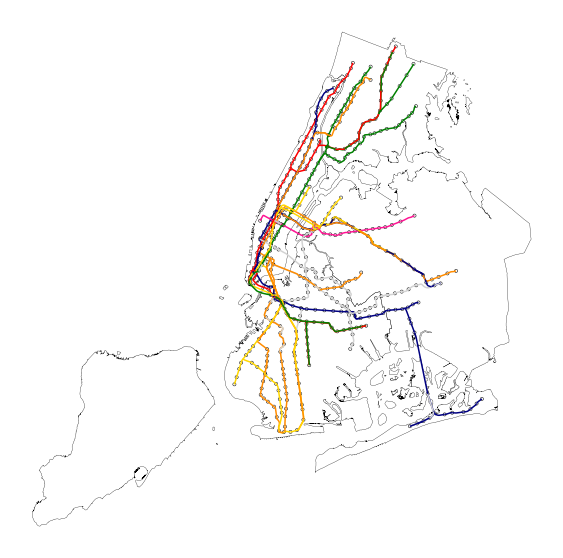

In [27]:
base = nyc_boro.plot(figsize=(10,10), linewidth=0.3, edgecolor='k', facecolor='none')
subway_lines.plot(ax=base, column ='name', color=subway_lines['color'])
subway_stations.plot(ax=base, markersize =10, color='none', edgecolor='k', linewidth=0.5)

plt.axis(False)
plt.show()

## 5. Add a background map
### Reqiurement: contextily package (The installation takes some time, so please do it yourself after the class)

    Anaconda Prompt (Windows) or terminal (Mac):
    conda install contextily --channel conda-forge
    
* Resource: https://contextily.readthedocs.io/en/latest/providers_deepdive.html

In [ ]:
# Load a package
import contextily as ctx

__List of basemap providers__

    'OpenStreetMap.Mapnik',
    'OpenTopoMap',
    'Stamen.Toner',
    'Stamen.TonerLite',
    'Stamen.Terrain',
    'Stamen.TerrainBackground',
    'Stamen.Watercolor',
    'NASAGIBS.ViirsEarthAtNight2012',
    'CartoDB.Positron',
    'CartoDB.Voyager'

# PART 2. Exploring NYC 311 data (again!)
## 1. Load data from Open API with the following conditions:
* Complaints reported between October 5, 2020 ~ October 11, 2020
* Only 'Illegal Parking' complaint type

In [ ]:
API = 'https://data.cityofnewyork.us/resource/erm2-nwe9.csv?'

# Let's get data collected on last Saturday (10/03/2020)

query = {'$select': '*',
         '$where': 'created_date>="2020-10-05" and created_date<"2020-10-12" and complaint_type="Illegal Parking"', 
         '$limit': 100000} # if you don't specify 'limit', it returns 1000 rows as default

df = pd.read_csv(API + urlencode(query),
                 parse_dates = ['created_date'],
                 dtype = {'incident_zip':'str'})
print (len(df))
df.head()

## 2. Convert Pandas dataframe to GeoPandas dataframe with geometry

In [ ]:
from shapely.geometry import Point # this package function is required to create point geometry

## 3. Load NTA data from NYC Open Data

In [ ]:
nta = pd.read_json('https://data.cityofnewyork.us/resource/q2z5-ai38.json')


## 4. Spatial Join of two GeoDataFrame
* We would like to add 'nta' information to the illegal parking data.

        Syntax:
        gpd.sjoin(left_df, right_df, how=~, op=~)
        
        op can be one of 'intersect', 'contains', 'within'. Default is 'interset'.
        
* Before conducting spatial join, the point coordinates containing null should be removed.

## 5. Create choropleth maps of illegal parking in the city every 6hours

In [ ]:
# Create 6-hour level timestamp (rounding to nearest 6hour)


In [ ]:
# Groupby date_hour and NTA to count the number of illegar parking complaints in a given NTA
# Once you group data by two columns, output will not have the geometry anymore.



In [ ]:
# Reset index and make a pivot table


# Create string type date_hour column



In [ ]:
# Sanity check first: 2020-10-05 00am
# If error: conda install -c conda-forge mapclassify


In [ ]:
fig, ax = plt.subplots(figsize=(10,20), ncols=4, nrows=7)

i = 0
for d in range(7):
    for h in range(4):
        
        date_hour_list = df_311_nta['date_hour_str'].unique().tolist()

        # Join this table and NTA geometry table
        gdf_nta_ip = pd.merge(nta, df_311_nta[df_311_nta['date_hour_str']==date_hour_list[i]], on='ntacode', how='left')
        gdf_nta_ip['illegal_parking_counts'] = gdf_nta_ip['illegal_parking_counts'].fillna(0)

        # Geography mapping
        mapping = gdf_nta_ip.boundary.plot(ax=ax[d][h], linewidth=0.2, edgecolor='k', alpha=0.5)
        gdf_nta_ip.plot(ax=ax[d][h], column='illegal_parking_counts', cmap='plasma', vmax=8)
        mapping.axis(False)
        mapping.set_title(date_hour_list[i], fontsize=9)
        i += 1        

plt.savefig('../output/mapping_test.png', dpi=150)
plt.show()

# PART 3: Creating interactive map with Folium
Folium builds on the data wrangling strengths of the Python ecosystem and the mapping strengths of the Leaflet.js library. Manipulate your data in Python, then visualize it in on a Leaflet map via Folium.

__Resource__:https://python-visualization.github.io/folium/modules.html

### Requirement: Folium package
        pip install folium 
        OR
        conda install -c conda-forge folium

In [ ]:
import folium
from folium.plugins import HeatMap

In [ ]:
from folium.plugins import MarkerCluster


In [ ]:
# Export your folium map as html page
base_map.save('../output/folium_test.html')

In [ ]:
# import the folium interactive html file

from IPython.display import HTML
HTML('<iframe src=../output/folium_test.html width=700 height=450></iframe>')